In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../data_loaders/")
sys.path.append("../forward_model/")
import stacklineplot
from pylab import rcParams
from scipy import signal
import random
from forward_model_dataloader import ForwardModelDataset
from add_noise_manual import AddNoiseManual

### Testing Functions

In [110]:
def apply_at_random_loc(x, adding, window_len, b=1):
    start = int(random.random() * (x.shape[1] - window_len))
    end = start + window_len
    adding_coef = [0] * start + [1] * window_len + [0] * (x.shape[1] - end)
    assert(len(adding_coef) == x.shape[1])
    adding_coef = np.asarray(adding_coef).reshape(768, 1)
    adding_coef = np.tile(adding_coef, (1, x.shape[0])).T
    adding *= adding_coef
    x += adding
    return x

In [62]:
def add_random_noise(x, b=1):
    noise = np.random.randn(x.shape[0], x.shape[1]) * .2
    return x + (noise * b)
def add_signal_square(x, b=1):
    t = np.linspace(0, x.shape[0], x.shape[1], endpoint=False)
    sig = np.sin(2 * np.pi * t)
    pwm = signal.square(t * np.pi * 40 * t * (random.random() ** 2 * 400)) #, duty=(sig + 1)/2)
    return x + (pwm * b)

In [174]:
def get_signal_square(x, b=1):
    t = np.linspace(0, x.shape[0], x.shape[1], endpoint=False)
    sig = np.sin(5 * np.pi * t)
    pwm = signal.square(t * np.pi * 5 * t) #, duty=(sig + 1)/2)
    pwm = np.tile(pwm.reshape(768, 1), (1, x.shape[0])).T
    return pwm * b

In [205]:
def get_sine_wave(x, freq_coef, b=1):
    n_channels = x.shape[0]
    n_samples = x.shape[1]
    z = np.linspace(0, n_channels, n_samples, endpoint=False) * freq_coef
    noise = np.sin(z)
    noise = np.tile(noise.reshape(n_samples, 1), (1, n_channels)).T
    return noise * b

In [214]:
x = np.zeros((20, 768))
x = np.random.randn(20, 768)
noise = get_signal_square(x, b=5)
x = apply_at_random_loc(x, noise, 400)
noise = get_sine_wave(x, freq_coef=9000, b=4)
x = apply_at_random_loc(x, noise, 400)

In [ ]:
sample = x
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(sample ,seconds=768/300, ylabels=list(range(sample.shape[0])), yscale=.3)

### From add_noise class

In [31]:
def normalize(batch):
    batch = batch - batch.mean()
    batch = batch / batch.std()
    batch = batch / np.abs(batch).max()
    return batch

set b to 1e4 for estimated (not normalized)

In [37]:
estimated_eegs = ForwardModelDataset(2, batch_size=2, save_source=True)
x = estimated_eegs.getEEGs(0)[0]
x = normalize(x)
# x = np.zeros((20, 1000))
# x = np.random.randn(20, 1000)
noise_adder = AddNoiseManual(b=.5)
x_noisy = noise_adder(x)

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Reading forward solution from /mnt/home2/dlongo/eegML/forward_model/sample_forward_model...
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]


../data_loaders/forward_model_dataloader.py:60: RuntimeWarning: This filename (/mnt/home2/dlongo/eegML/forward_model/sample_forward_model) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif or _fwd.fif.gz
  fwd = mne.read_forward_solution("/mnt/home2/dlongo/eegML/forward_model/sample_forward_model")


Projecting source estimate to sensor space...
[done]
Projecting source estimate to sensor space...
[done]


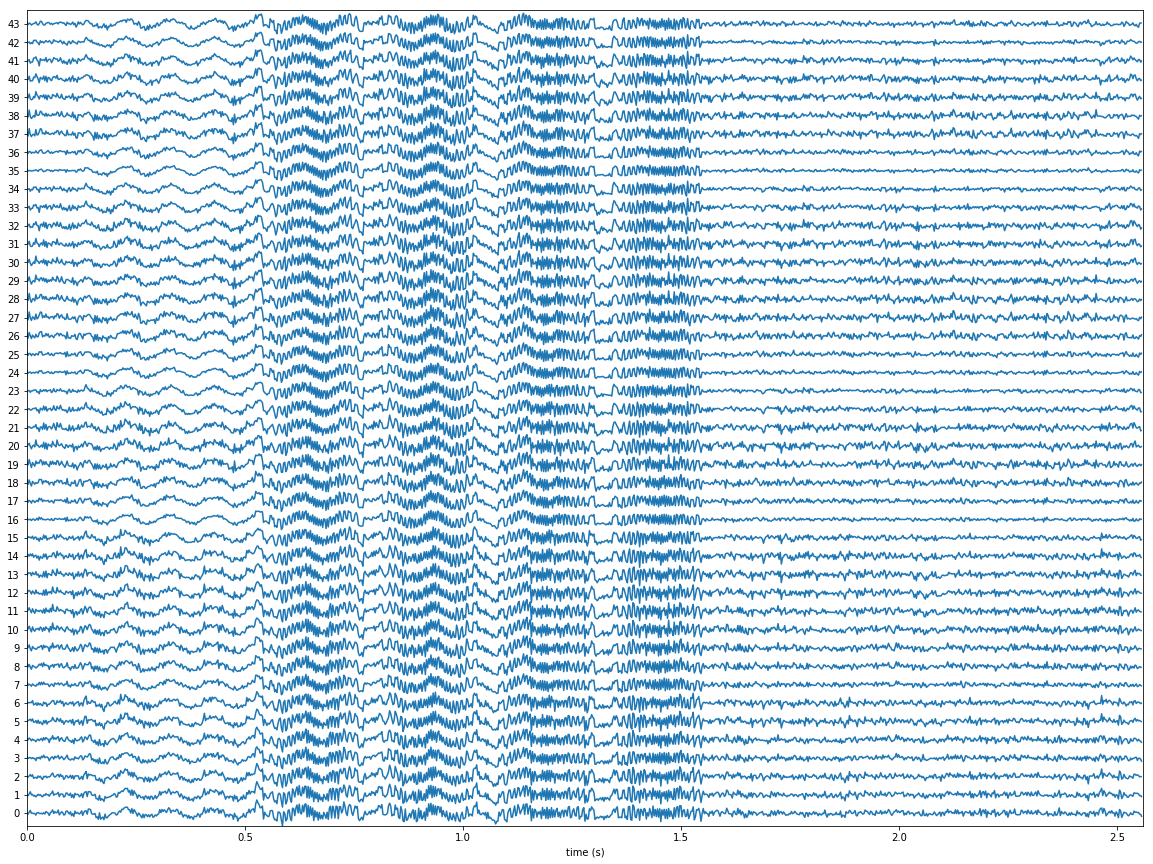

In [38]:
sample = x_noisy
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(sample ,seconds=768/300, ylabels=list(range(sample.shape[0])), yscale=1)